{'x': [1, 2, 2, 3, 4, 4, 5, 6], 'y': [2, 3, 4, 4, 4, 6, 5, 7]}
   x  y
0  1  2
1  2  3
2  2  4
3  3  4
4  4  4
5  4  6
6  5  5
7  6  7
Total de x: 27
Total de y: 35
    x   y
0   1   2
1   2   3
2   2   4
3   3   4
4   4   4
5   4   6
6   5   5
7   6   7
8  27  35
    x   y  x*y  x^2
0   1   2    2    1
1   2   3    6    4
2   2   4    8    4
3   3   4   12    9
4   4   4   16   16
5   4   6   24   16
6   5   5   25   25
7   6   7   42   36
8  27  35  135  111
Pendiente (m): 0.8490566037735849
Promedio de x: 3.375
Promedio de y: 4.375
Ordenada al origen (b): 1.5094339622641506
Ecuación de la recta: y = 0.849x + 1.509


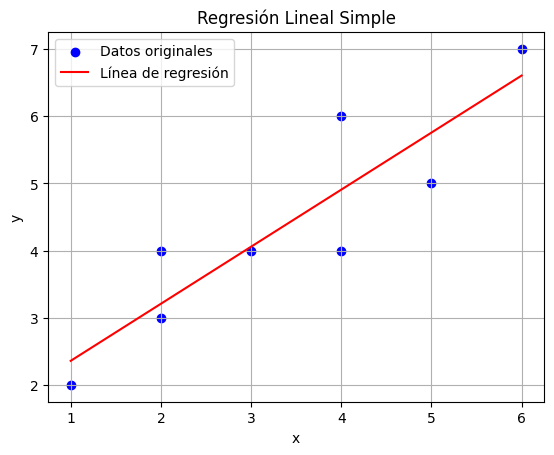

    x   y  x*y  x^2    y_pred
0   1   2    2    1  2.358491
1   2   3    6    4  3.207547
2   2   4    8    4  3.207547
3   3   4   12    9  4.056604
4   4   4   16   16   4.90566
5   4   6   24   16   4.90566
6   5   5   25   25  5.754717
7   6   7   42   36  6.603774
8  27  35  135  111          
Ecuación de la recta: y = 0.849x + 1.509


<ipython-input-14-f319e6560b2e>:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[n, "y_pred"] = ""


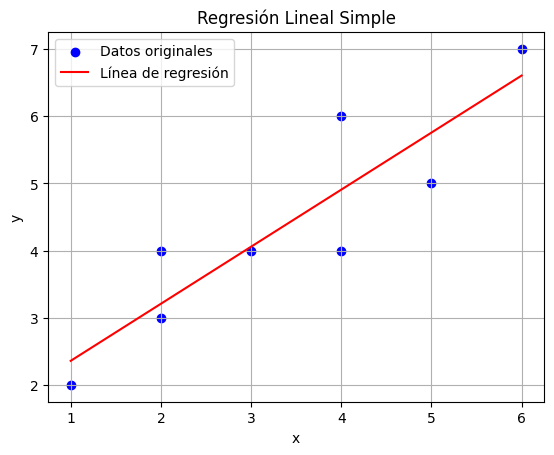

,x,y,x*y,x^2,y_pred
0,1,2,2,1,2.358491
1,2,3,6,4,3.207547
2,2,4,8,4,3.207547
3,3,4,12,9,4.056604
4,4,4,16,16,4.90566
5,4,6,24,16,4.90566
6,5,5,25,25,5.754717
7,6,7,42,36,6.603774
8,27,35,135,111,


In [ ]:
import pandas as pd

# Create a dataset
# Let's build the values lists
value_x_list = [1,2,2,3,4,4,5,6]
value_y_list = [2,3,4,4,4,6,5,7]


# Let's use a dictionary ({key:value})
# with the format {"str":list}
data_dict = {"x": value_x_list,
             "y": value_y_list,#,
             }

print(data_dict)

# Turn a dictionary into a dataframe
df = pd.DataFrame(data_dict)
print(df)


total_x = df["x"].sum()
total_y = df["y"].sum()

print("Total de x:", total_x)
print("Total de y:", total_y)

# Agregar la fila de sumatorias al final del DataFrame
df.loc[len(df)] = [total_x, total_y]

# Mostrar DataFrame con sumatoria
print(df)
df

# Crear listas de valores
value_x_list = [1, 2, 2, 3, 4, 4, 5, 6]
value_y_list = [2, 3, 4, 4, 4, 6, 5, 7]

# Crear diccionario
data_dict = {"x": value_x_list, "y": value_y_list}

# Convertir a DataFrame
df = pd.DataFrame(data_dict)

# Agregar columna x*y
df["x*y"] = df["x"] * df["y"]

# Agregar columna x^2
df["x^2"] = df["x"] ** 2

# Calcular sumatorias
total_x = df["x"].sum()
total_y = df["y"].sum()
total_xy = df["x*y"].sum()
total_x2 = df["x^2"].sum()

# Agregar fila de sumatorias
df.loc[len(df)] = [total_x, total_y, total_xy, total_x2]

# Mostrar DataFrame
print(df)

n = len(df) - 1  # Restamos 1 porque la última fila es la de sumatorias
sum_x = df.loc[n, "x"]
sum_y = df.loc[n, "y"]
sum_xy = df.loc[n, "x*y"]
sum_x2 = df.loc[n, "x^2"]

# Cálculo de la pendiente con mínimos cuadrados
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

print("Pendiente (m):", m)

# Calcular promedios
promedio_x = sum_x / n
promedio_y = sum_y / n

# Calcular b usando la fórmula
b = promedio_y - m * promedio_x

print("Promedio de x:", promedio_x)
print("Promedio de y:", promedio_y)
print("Ordenada al origen (b):", b)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos extraídos de la imagen
x = np.array([1, 2, 2, 3, 4, 4, 5, 6]).reshape(-1, 1)
y = np.array([2, 3, 4, 4, 4, 6, 5, 7])

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(x, y)

# Obtener los coeficientes
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Ecuación de la recta: y = {pendiente:.3f}x + {intercepto:.3f}")

# Generar la línea de regresión
x_linea = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_linea = modelo.predict(x_linea)

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color='blue', label='Datos originales')
plt.plot(x_linea, y_linea, color='red', label='Línea de regresión')
plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Agregar columna de y predicho al DataFrame (excepto la última fila de sumatorias)
df.loc[0:n-1, "y_pred"] = df.loc[0:n-1, "x"].apply(lambda x: m * x + b)

# Para la fila de sumatorias, opcionalmente deja vacío el valor predicho
df.loc[n, "y_pred"] = ""

# Mostrar DataFrame con y_predicho
print(df)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos extraídos de la imagen
x = np.array([1, 2, 2, 3, 4, 4, 5, 6]).reshape(-1, 1)
y = np.array([2, 3, 4, 4, 4, 6, 5, 7])

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(x, y)

# Obtener los coeficientes
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Ecuación de la recta: y = {pendiente:.3f}x + {intercepto:.3f}")

# Generar la línea de regresión
x_linea = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_linea = modelo.predict(x_linea)

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color='blue', label='Datos originales')
plt.plot(x_linea, y_linea, color='red', label='Línea de regresión')
plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
df

In [2]:
import pandas as pd

# Datos iniciales
x = [1, 2, 2, 3, 4, 4, 5, 6]
y = [2, 3, 4, 4, 4, 6, 5, 7]

# Cálculos intermedios
xy = [xi * yi for xi, yi in zip(x, y)]
x2 = [xi ** 2 for xi in x]

# Sumas necesarias
n = len(x)
sum_x = sum(x)
sum_y = sum(y)
sum_xy = sum(xy)
sum_x2 = sum(x2)

# Cálculo de coeficientes
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
x_prom = sum_x / n
y_prom = sum_y / n
b = y_prom - m * x_prom

# Predicciones y errores
y_pred = [m * xi + b for xi in x]
residuales = [yi - ypi for yi, ypi in zip(y, y_pred)]
residuales2 = [(yi - ypi)**2 for yi, ypi in zip(y, y_pred)]

# Crear DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'xy': xy,
    'x²': x2,
    'ŷ (y_pred)': [round(val, 3) for val in y_pred],
    'y - ŷ': [round(val, 3) for val in residuales],
    '(y - ŷ)²': [round(val, 3) for val in residuales2]
})

# Agregar fila de sumas
df.loc['Σ'] = [
    sum(x),
    sum(y),
    sum(xy),
    sum(x2),
    '',
    '',
    round(sum(residuales2), 3)
]

# Mostrar resultados
print(" Tabla de regresión lineal simple con predicción y error cuadrático:")
display(df)

print(f"\n Ecuación de la recta: y = {m:.4f}x + {b:.4f}")
print(f" Error cuadrático total: {sum(residuales2):.4f}")

 Tabla de regresión lineal simple con predicción y error cuadrático:


,x,y,xy,x²,ŷ (y_pred),y - ŷ,(y - ŷ)²
0,1,2,2,1,2.358,-0.358,0.129
1,2,3,6,4,3.208,-0.208,0.043
2,2,4,8,4,3.208,0.792,0.628
3,3,4,12,9,4.057,-0.057,0.003
4,4,4,16,16,4.906,-0.906,0.820
5,4,6,24,16,4.906,1.094,1.198
6,5,5,25,25,5.755,-0.755,0.570
7,6,7,42,36,6.604,0.396,0.157
Σ,27,35,135,111,,,3.547



 Ecuación de la recta: y = 0.8491x + 1.5094
 Error cuadrático total: 3.5472
